# Part I


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## Phase 1:


### Exploratory Data Analysis:

In [2]:
df = pd.read_csv('Spaceship data.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Missing values**

In [4]:
def print_nulls_info(data = df, exlude_zero = False):
    table = PrettyTable()
    if exlude_zero:
        data = data.loc[:, data.isna().sum() > 0]

    table.field_names = ['Column Name', 'Data Type', 'Null Count', 'Null Percentage']
    for column in data.columns:
        data_type = str(data[column].dtype)
        null_count = data[column].isna().sum()
        null_percentage = (null_count / len(data)) * 100
        table.add_row([column, data_type, null_count, f"{null_percentage:.2f}%"])
    print(table)

print_nulls_info()

+--------------+-----------+------------+-----------------+
| Column Name  | Data Type | Null Count | Null Percentage |
+--------------+-----------+------------+-----------------+
| PassengerId  |   object  |     0      |      0.00%      |
|  HomePlanet  |   object  |    201     |      2.31%      |
|  CryoSleep   |   object  |    217     |      2.50%      |
|    Cabin     |   object  |    199     |      2.29%      |
| Destination  |   object  |    182     |      2.09%      |
|     Age      |  float64  |    179     |      2.06%      |
|     VIP      |   object  |    203     |      2.34%      |
| RoomService  |  float64  |    181     |      2.08%      |
|  FoodCourt   |  float64  |    183     |      2.11%      |
| ShoppingMall |  float64  |    208     |      2.39%      |
|     Spa      |  float64  |    183     |      2.11%      |
|    VRDeck    |  float64  |    188     |      2.16%      |
|     Name     |   object  |    200     |      2.30%      |
| Transported  |    bool   |     0      

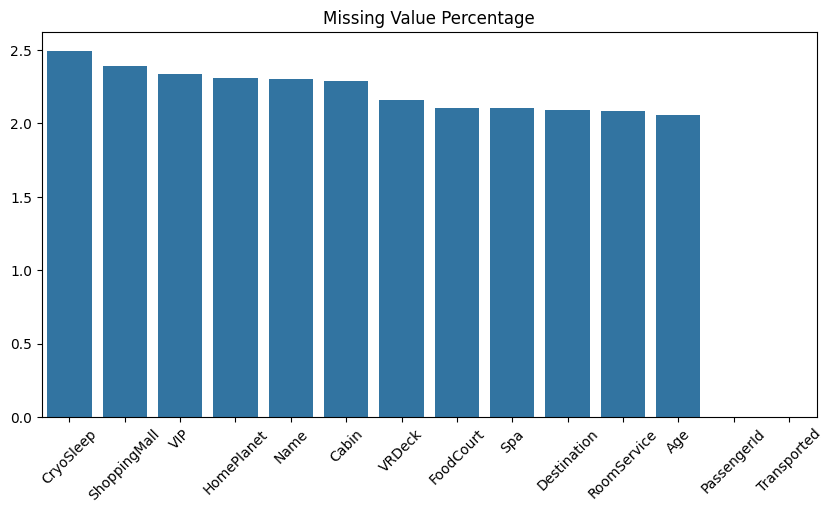

In [5]:
# Missing value visualization
missing = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values*100)
plt.xticks(rotation=45)
plt.title("Missing Value Percentage")
plt.xlabel("")
plt.show()

We can see that almost every feature has a missing value.

**Data types**

In [6]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

There are 6 continuous features, 4 categorical features (excluding the target) and 3 descriptive/qualitative features.

We will need to transform the categorical and descriptive features to numeric so we can train ML models.

#### Target Analysis:

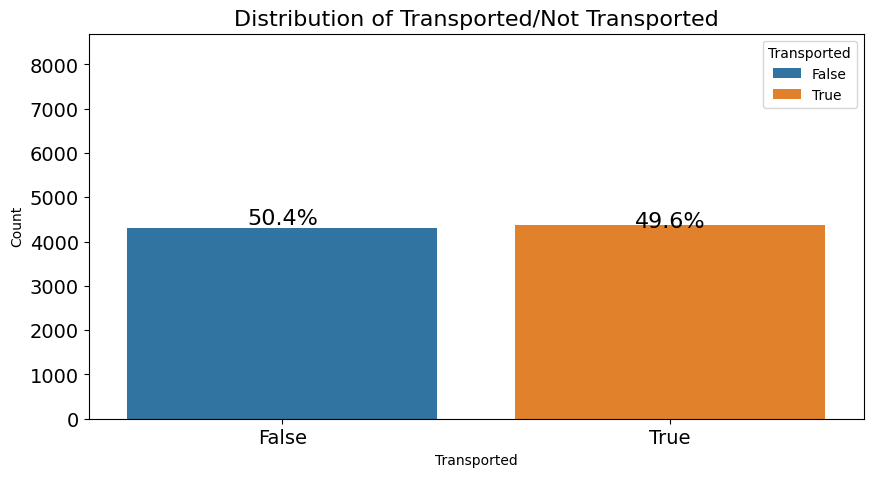

In [8]:
# Counts and proportions
counts = df['Transported'].value_counts()
proportions = df['Transported'].value_counts(normalize=True)

proportions_str = [f'{p:.1%}' for p in proportions]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Transported', data=df, hue='Transported')
plt.title('Distribution of Transported/Not Transported', fontsize=16)
plt.xlabel('Transported')
plt.ylabel('Count')

plt.ylim(0, len(df))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate percentages
for i, count in enumerate(counts):
    plt.text(i, count, proportions_str[i], ha='center', fontsize=16)

plt.show()


The **`Transported`** column is what we want to predict. As we can see there are about the same number of people who Transporned/Non-Transported.

***



#### Feature Analysis:

**Continuous features**

Text(0.5, 0, 'Age (years)')

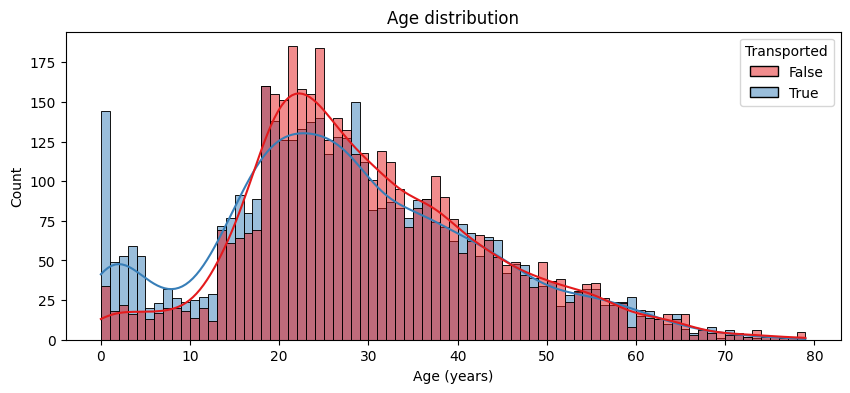

In [9]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True, palette="Set1")

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

We noticed theres a separation between ages.
* 0-18 years-olds were more likely to be transported
* 18-40 were less likely to be transported.
* 40+ were equally likely to be transported.

We will probably create age group feature later because of those insights. 

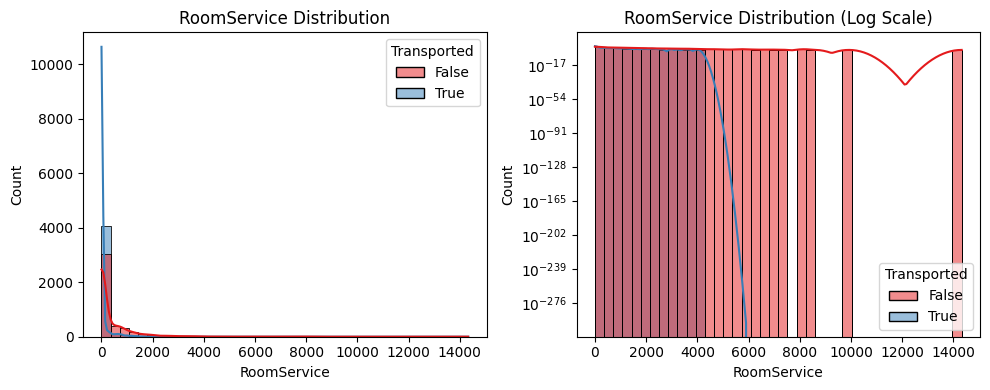

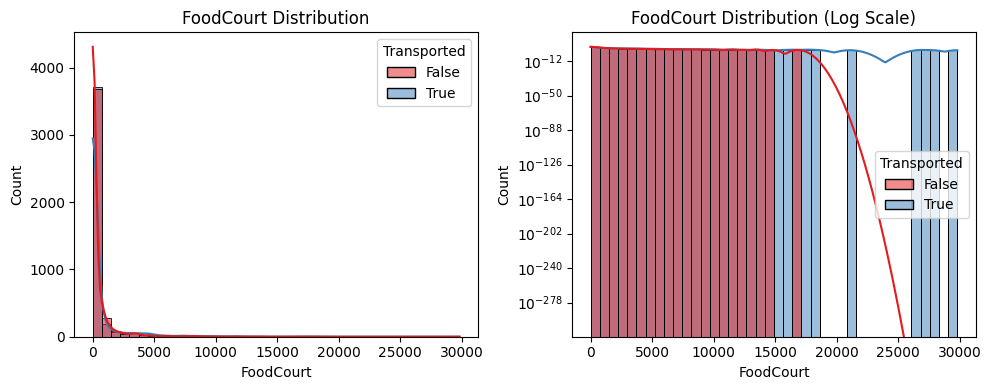

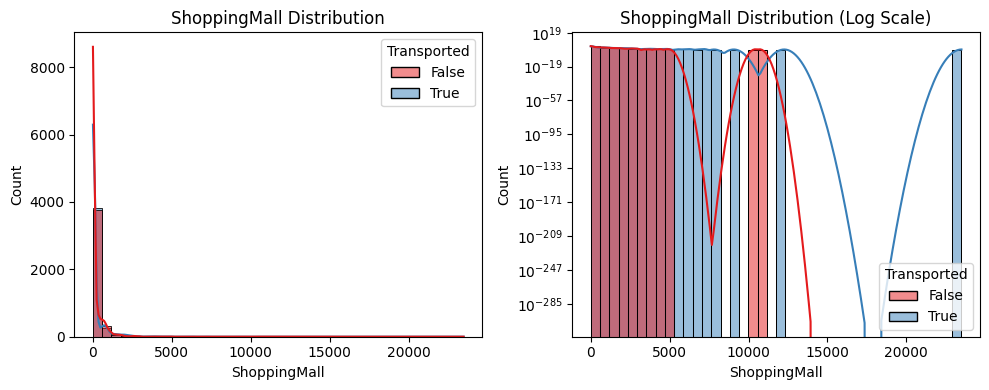

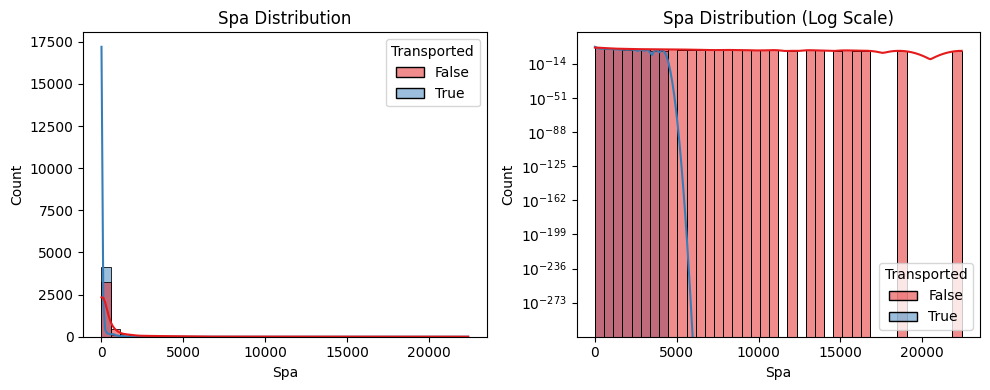

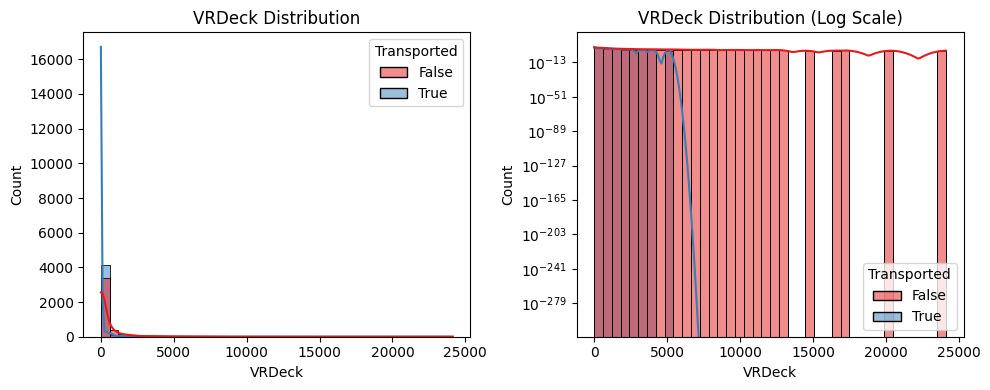

In [10]:
continuous_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in continuous_cols:
    if col == "Age":
        continue

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(col + " Distribution")
    sns.histplot(
        df,
        x=col,
        hue="Transported",
        bins=40,
        kde=True,
        palette="Set1"
    )
    plt.tight_layout()
    
    plt.subplot(1, 2, 2)
    plt.title(col + " Distribution (Log Scale)")
    sns.histplot(
        df,
        x=col,
        hue="Transported",
        bins=40,
        kde=True,
        palette="Set1"
    )
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

We limited y axis to zoom in on the plot. 

* The plots shows mostly 0 meaning most people didnt spend money. There is a small number of outlier which spent a lot of money.
* Passengers who spent money had less chance of being transported, especially those who spent in RoomService, Spa and VRDeck


We will create a feature which will aggregate all 5 expenses.





**Categorical Analysis**

In [11]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
cat_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

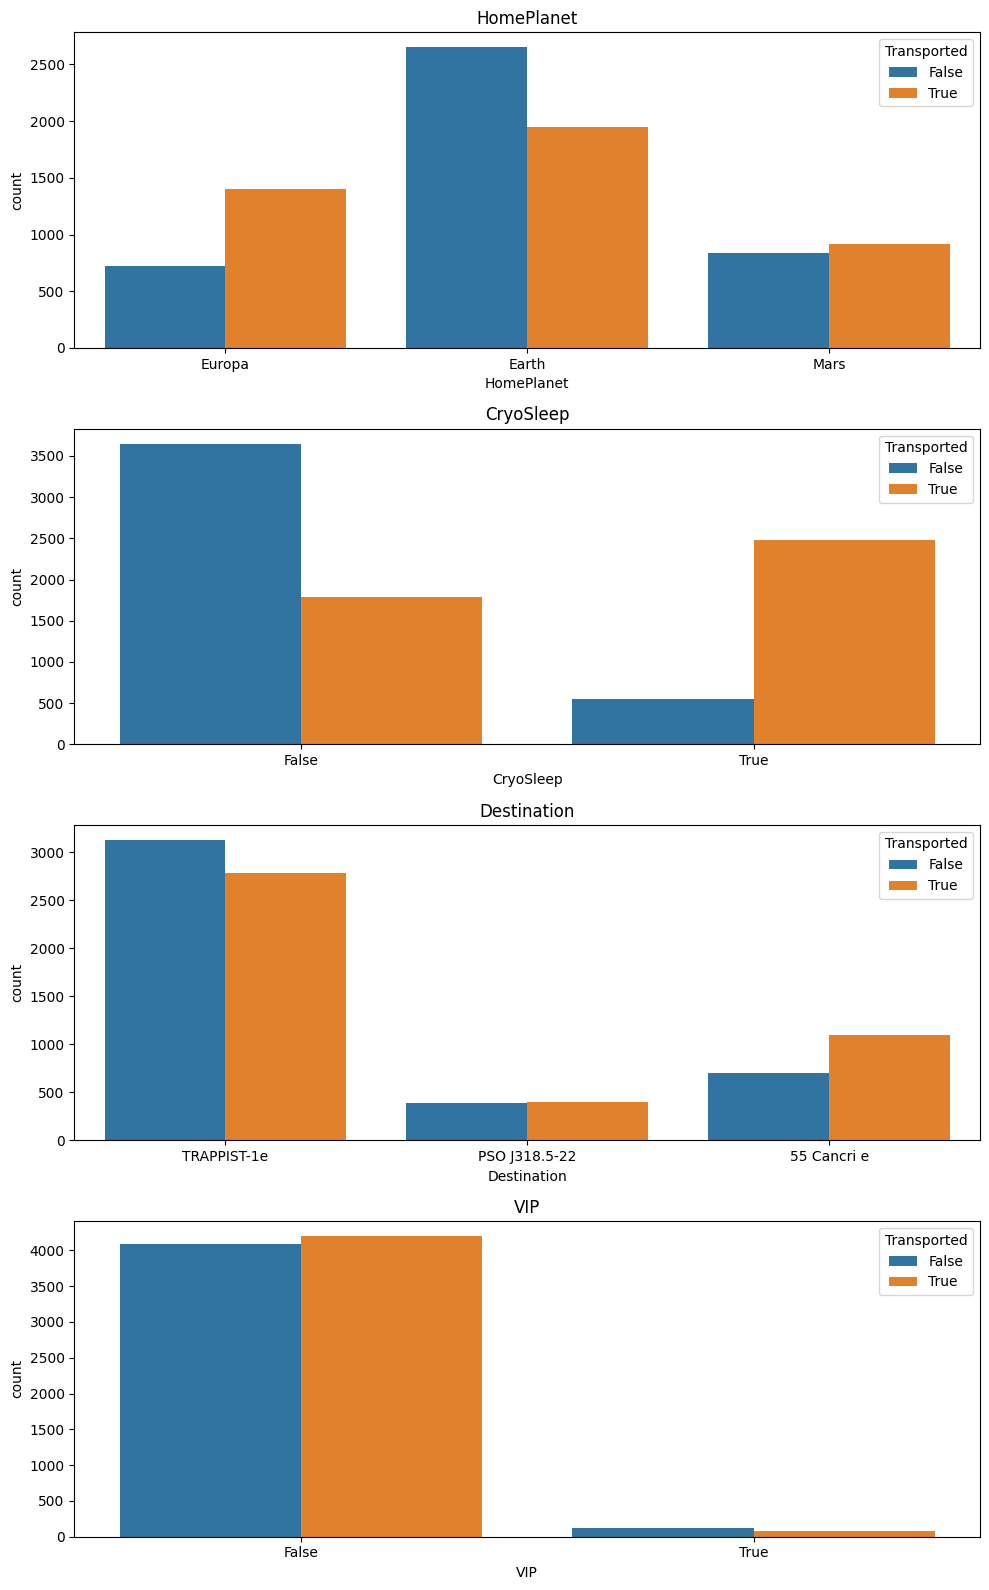

In [12]:
target = 'Transported'

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_features):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Consider drop the VIP feature because it doesn't help to predict Transported/not.

The analysis indicates that CryoSleep is strongly associated with the target variable, while HomePlanet and Destination show moderate effects.


***

## Phase 2:



### Data Prepping:

* We want to extract passengers group to learn group sizes.
* We want to extract deck cabin number and side from cabin.
* We want to extract surnames to identify families.

In [13]:
# Extract PassengerGroup from PassengerId
df['PassengerGroup'] = df['PassengerId'].str.split('_').str[0].astype(int)

# Compute group size
group_sizes = df['PassengerGroup'].value_counts()
df['GroupSize'] = df['PassengerGroup'].map(group_sizes)

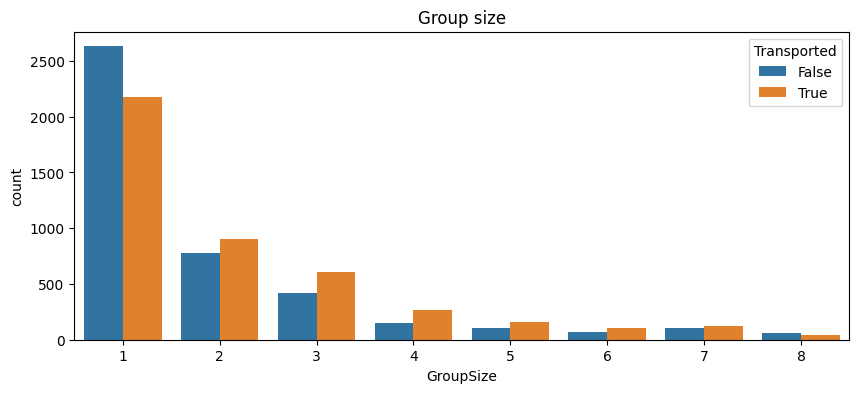

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='GroupSize', hue='Transported')
plt.title('Group size')
plt.show()

Theres separation between solo passengers and groups. Solo passengers are less likely to be transported then groups.

We will create binary feature Solo, to track which passenger is traveling solo.

In [15]:
df['Solo'] = df['GroupSize'] == 1

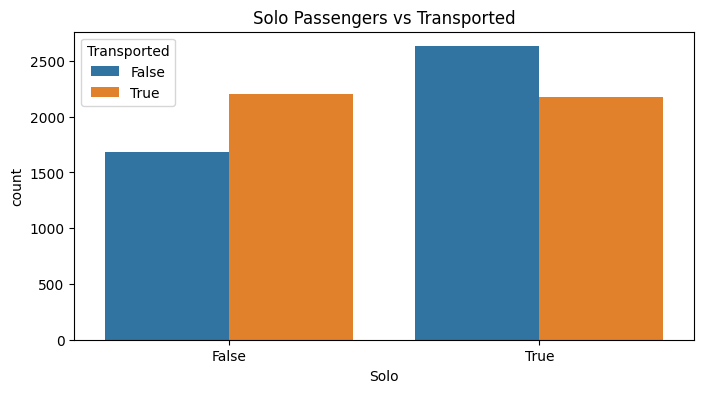

In [16]:
# Solos vs Transported
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Solo', hue='Transported')
plt.title('Solo Passengers vs Transported')
plt.show()

**Spendings**

Creating TotalSpent and NoSpendings features.

In [17]:
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df['TotalSpent'] = df[spending_cols].sum(axis=1)
df['NoSpendings'] = df['TotalSpent'] == 0

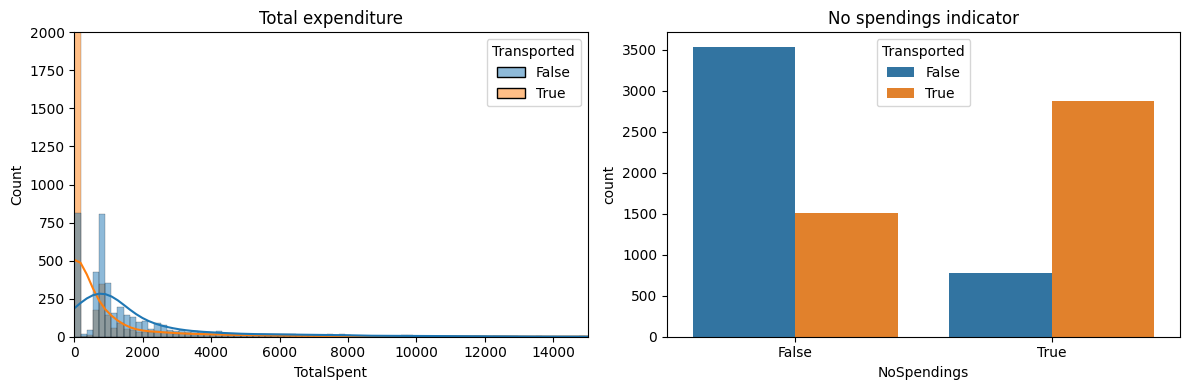

In [18]:
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='TotalSpent', hue='Transported', bins=200, kde=True)
plt.title('Total expenditure')
plt.ylim([0,2000])
plt.xlim([0,15000])

plt.subplot(1,2,2)
sns.countplot(data=df, x='NoSpendings', hue='Transported')
plt.title('No spendings indicator')
fig.tight_layout()

Now it's very clear - passengers who didn't spent money were more likely to be transported.

**Age Groups**

We now divde passengers to age groups, this will later help us fill in missing features.

In [19]:
df['Age_group']=np.nan
df.loc[df['Age']<=12,'Age_group']='Age_0-12'
df.loc[(df['Age']>12) & (df['Age']<=17),'Age_group']='Age_13-17'
df.loc[(df['Age']>17) & (df['Age']<=25),'Age_group']='Age_18-25'
df.loc[(df['Age']>25) & (df['Age']<=30),'Age_group']='Age_26-30'
df.loc[(df['Age']>30) & (df['Age']<=50),'Age_group']='Age_31-50'
df.loc[df['Age']>50,'Age_group']='Age_51+'

C:\Users\Yuval\AppData\Local\Temp\ipykernel_12864\2200636527.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age']<=12,'Age_group']='Age_0-12'


we decided on those age groups beacuse we saw that divison in other notebooks, and how well it worked with this division.

Text(0.5, 1.0, 'Age group distribution')

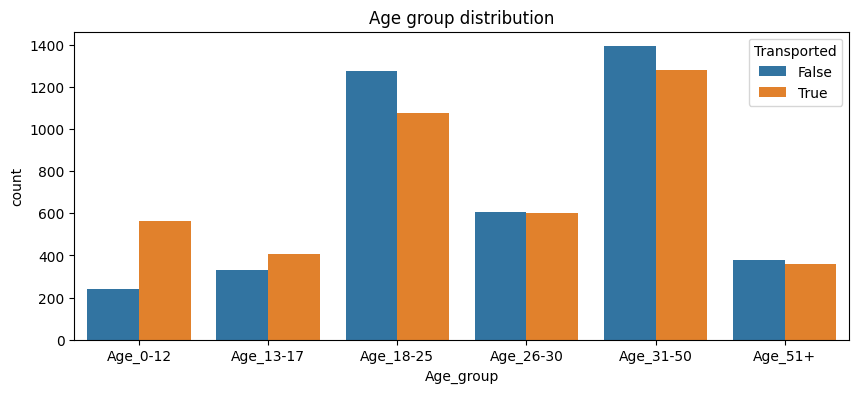

In [20]:
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

**Cabin**

We will now extract deck, cabin number and side from cabin.

In [21]:
# Replace NaN's with outliers for now (so we can split feature)
df['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
df['Cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
df['Cabin_number'] = df['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
df['Cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
df.loc[df['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
df.loc[df['Cabin_number']==9999, 'Cabin_number']=np.nan
df.loc[df['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
df.drop('Cabin', axis=1, inplace=True)


C:\Users\Yuval\AppData\Local\Temp\ipykernel_12864\2283611056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Z/9999/Z', inplace=True)


(0.0, 2000.0)

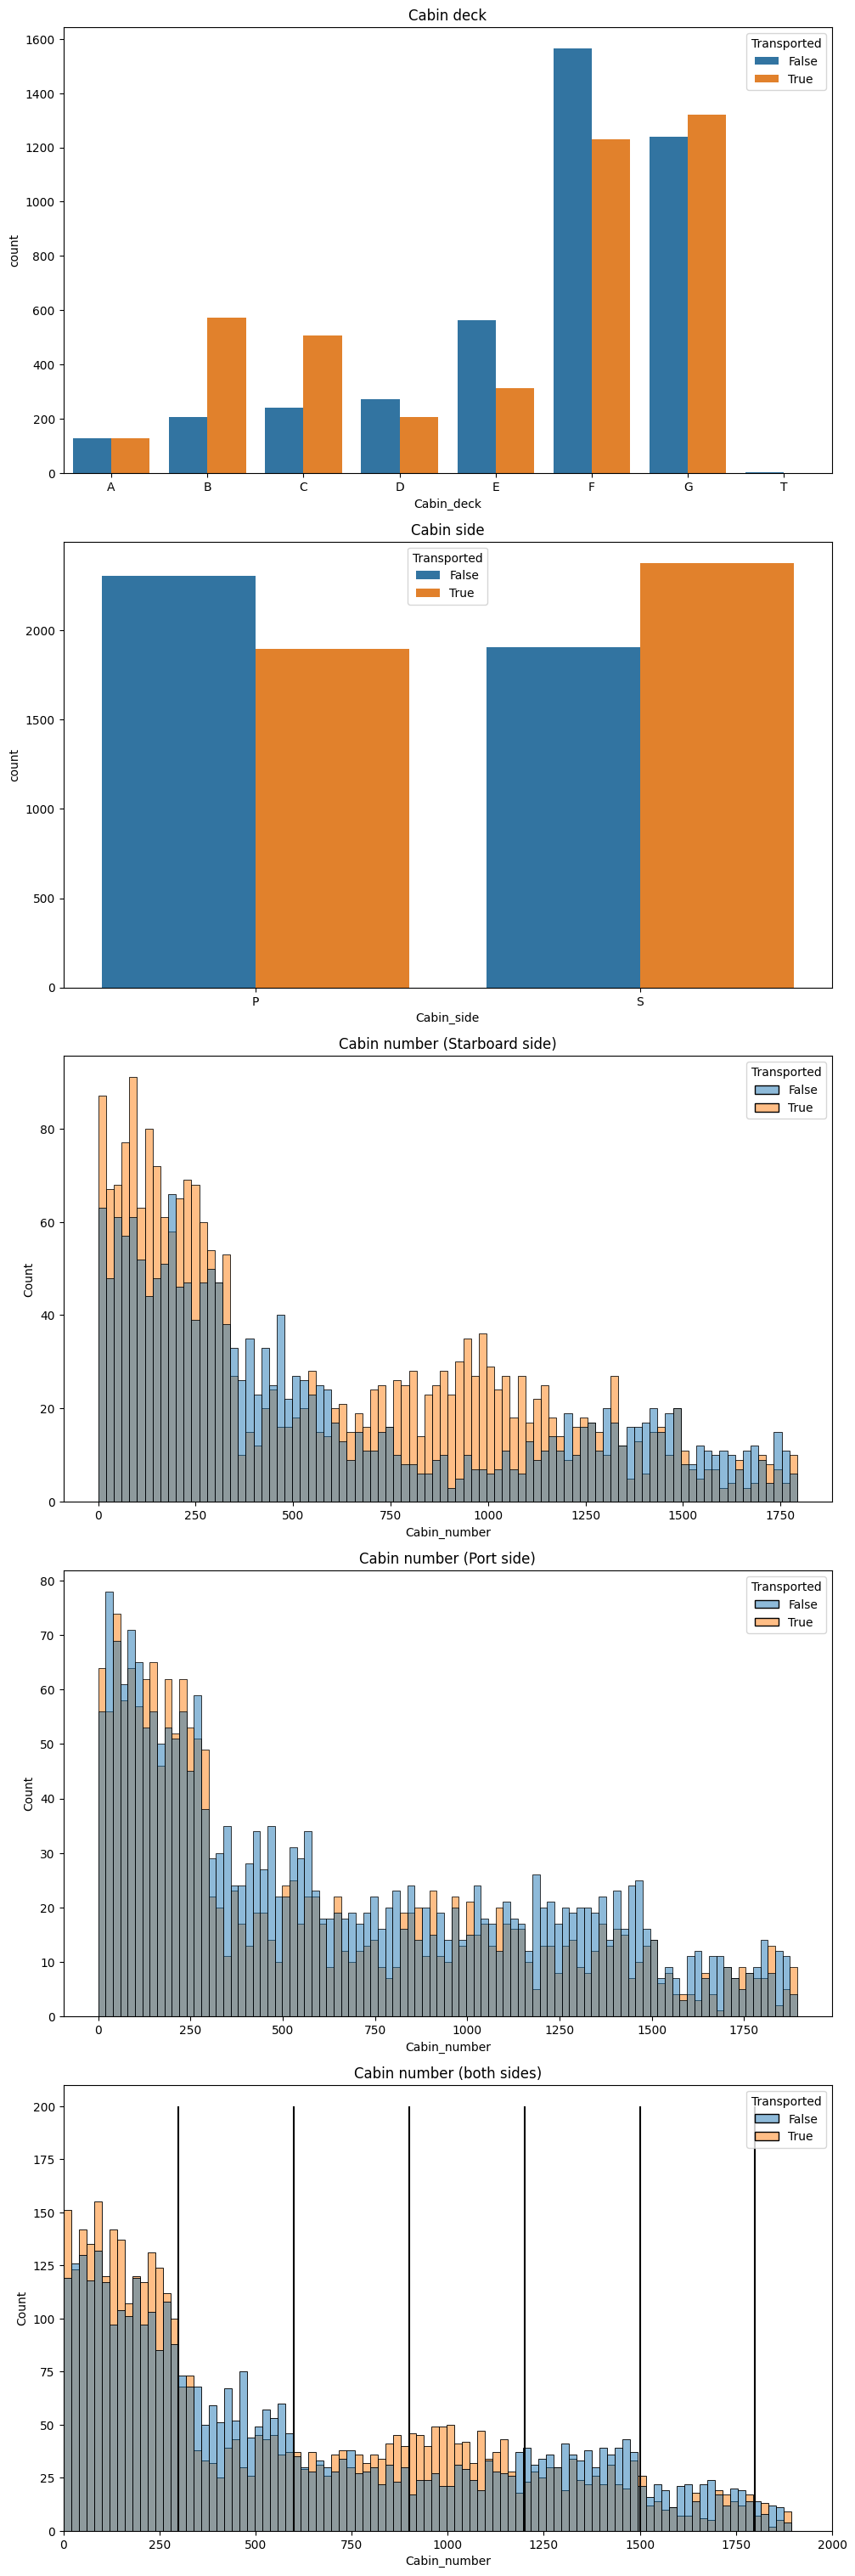

In [22]:
# Plot distribution of new features
fig=plt.figure(figsize=(10,30))
plt.subplot(5,1,1)
sns.countplot(data=df, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(5,1,3)
sns.histplot(
    data=df[df["Cabin_side"] == "S"],
    x="Cabin_number",
    hue="Transported",
    binwidth=20
)
plt.title('Cabin number (Starboard side)')

plt.subplot(5,1,4)
sns.histplot(
    data=df[df["Cabin_side"] == "P"],
    x="Cabin_number",
    hue="Transported",
    binwidth=20
)
plt.title('Cabin number (Port side)')

plt.subplot(5,1,2)
sns.countplot(data=df, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

plt.subplot(5,1,5)
sns.histplot(data=df, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number (both sides)')
plt.xlim([0,2000])


we noticed we can aggregate cabin number from both ship sides, now we got a result we can divide into chunks of 300 cabins. This will allow us to compress this feature into categorical feature.

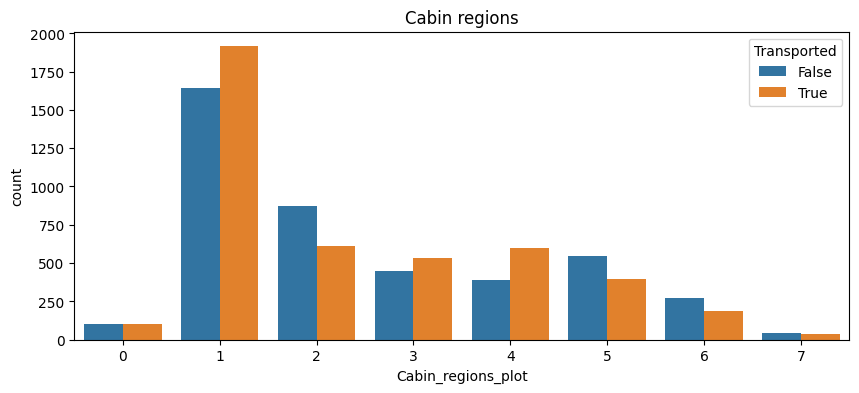

In [23]:
# New features - training set
df['Cabin_region1']=(df['Cabin_number']<300).astype(int)   # one-hot encoding
df['Cabin_region2']=((df['Cabin_number']>=300) & (df['Cabin_number']<600)).astype(int)
df['Cabin_region3']=((df['Cabin_number']>=600) & (df['Cabin_number']<900)).astype(int)
df['Cabin_region4']=((df['Cabin_number']>=900) & (df['Cabin_number']<1200)).astype(int)
df['Cabin_region5']=((df['Cabin_number']>=1200) & (df['Cabin_number']<1500)).astype(int)
df['Cabin_region6']=((df['Cabin_number']>=1500) & (df['Cabin_number']<1800)).astype(int)
df['Cabin_region7']=(df['Cabin_number']>=1800).astype(int)


# Plot distribution of new features
plt.figure(figsize=(10,4))
df['Cabin_regions_plot']=(df['Cabin_region1']+2*df['Cabin_region2']+3*df['Cabin_region3']+4*df['Cabin_region4']+5*df['Cabin_region5']+6*df['Cabin_region6']+7*df['Cabin_region7']).astype(int)
sns.countplot(data=df, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
df.drop('Cabin_regions_plot', axis=1, inplace=True)

**Last name**

In [24]:
missing_name_count = df['Name'].isna().sum()
print("Missing names before filling:", missing_name_count)

Missing names before filling: 200


In [25]:
# Fill missing names
df['Name'].fillna('Unknown Unknown', inplace=True)

# Split Name into First and Last names
full_name = df['Name'].str.split(' ')
df['First_name'] = full_name.str[0]
df['Last_name'] = full_name.str[1]

print("first name examples:", df['First_name'].unique()[:10])
print("last name examples:", df['Last_name'].unique()[:10])

first name examples: ['Maham' 'Juanna' 'Altark' 'Solam' 'Willy' 'Sandie' 'Billex' 'Candra'
 'Andona' 'Erraiam']
last name examples: ['Ofracculy' 'Vines' 'Susent' 'Santantines' 'Hinetthews' 'Jacostaffey'
 'Beston' 'Flatic' 'Barne' 'Baketton']


C:\Users\Yuval\AppData\Local\Temp\ipykernel_12864\1956995864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna('Unknown Unknown', inplace=True)


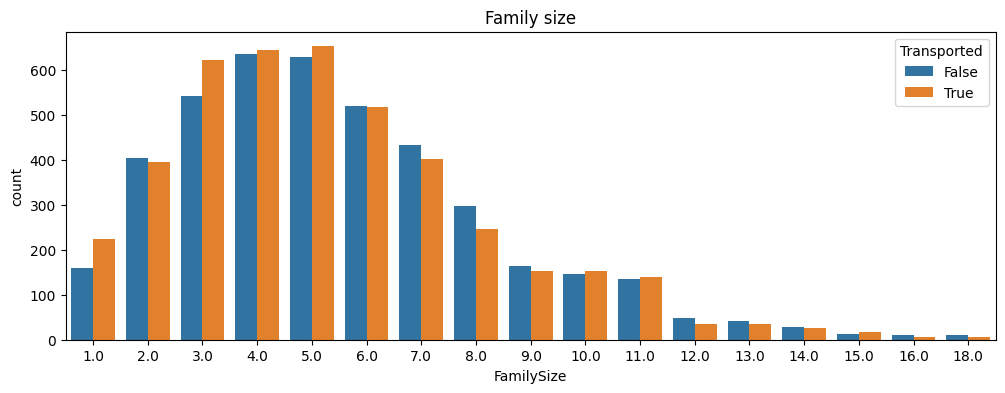

In [26]:
# Family size feature
df['FamilySize'] = df['Last_name'].map(df['Last_name'].value_counts())

df.loc[df['Last_name'] == 'Unknown', 'Last_name'] = np.nan
# Putting NaN's back in for FamilySize where names were missing
df.loc[df['FamilySize'] == missing_name_count, 'FamilySize'] = np.nan

# Drop Name
df.drop('Name', axis=1, inplace=True)

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='FamilySize', hue='Transported')
plt.title('Family size')
plt.show()

### Missing Values

**Counting missing values**

In [27]:
print_nulls_info(exlude_zero=True)

+--------------+-----------+------------+-----------------+
| Column Name  | Data Type | Null Count | Null Percentage |
+--------------+-----------+------------+-----------------+
|  HomePlanet  |   object  |    201     |      2.31%      |
|  CryoSleep   |   object  |    217     |      2.50%      |
| Destination  |   object  |    182     |      2.09%      |
|     Age      |  float64  |    179     |      2.06%      |
|     VIP      |   object  |    203     |      2.34%      |
| RoomService  |  float64  |    181     |      2.08%      |
|  FoodCourt   |  float64  |    183     |      2.11%      |
| ShoppingMall |  float64  |    208     |      2.39%      |
|     Spa      |  float64  |    183     |      2.11%      |
|    VRDeck    |  float64  |    188     |      2.16%      |
|  Age_group   |   object  |    179     |      2.06%      |
|  Cabin_deck  |   object  |    199     |      2.29%      |
| Cabin_number |  float64  |    199     |      2.29%      |
|  Cabin_side  |   object  |    199     

About 2% of the data is missing.

**Missing values per passenger**

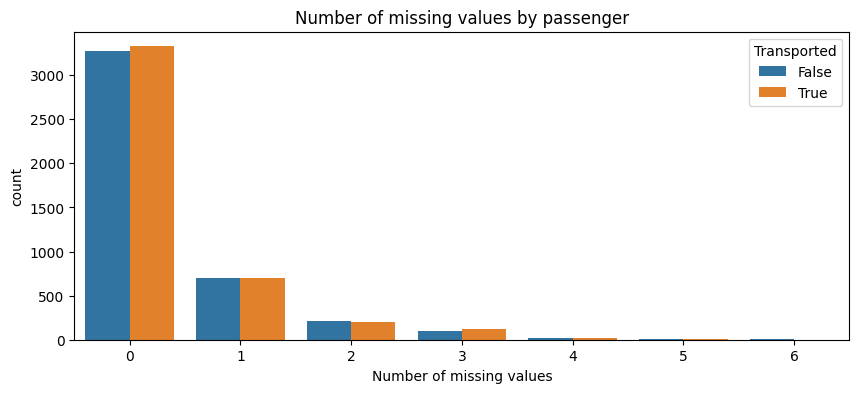

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x=df.isna().sum(axis=1), hue='Transported')
plt.title('Number of missing values by passenger')
plt.xlabel('Number of missing values')
plt.show()

Missing values are not related to transported column. 

In [29]:
# Number of passenger with missing values 
num_passengers_with_missing = (df.isna().sum(axis=1)).sum()
print("Number of passengers with missing values:", num_passengers_with_missing)

Number of passengers with missing values: 3101


Text(0.5, 1.0, 'Heatmap of missing values')

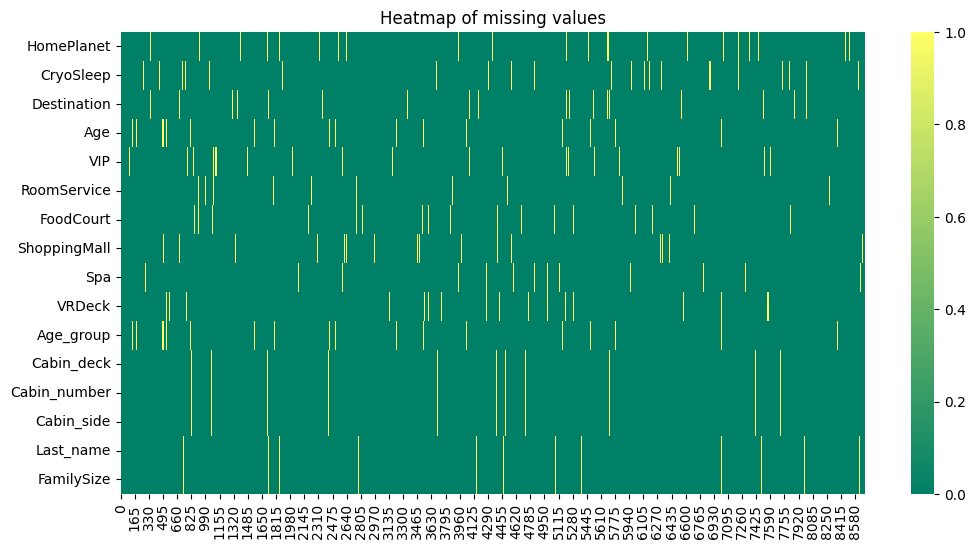

In [30]:
na_cols=df.columns[df.isna().any()].tolist()
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

From the heatmap we can see that some missing values happening for the same passenger (e.g. FamilySize and Last_name), this mostly happens with features we splitted.

**HomePlanet and Group**

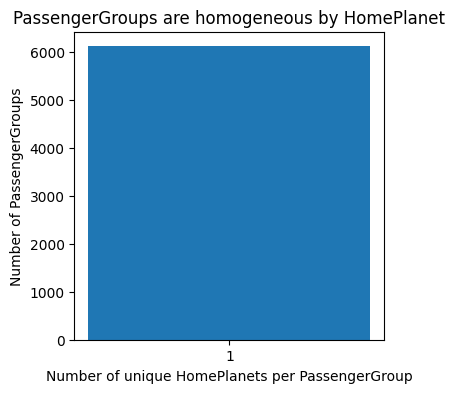

In [31]:
PG_HP = df.groupby(['PassengerGroup', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

counts = (PG_HP > 0).sum(axis=1).value_counts().sort_index()

plt.figure(figsize=(4, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Number of unique HomePlanets per PassengerGroup")
plt.ylabel("Number of PassengerGroups")
plt.title("PassengerGroups are homogeneous by HomePlanet")
plt.show()


According to the plot, passengers from the same group also came from the same HomePlanet. We will fill NaNs in HomePlant using this.

In [32]:
HP_start = df['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
PG_GP_i=df[df['HomePlanet'].isna()][(df[df['HomePlanet'].isna()]['PassengerGroup']).isin(PG_HP.index)].index

# Fill correspoding NaN values
df.loc[PG_GP_i, 'HomePlanet'] = df.iloc[PG_GP_i,:]['PassengerGroup'].map(PG_HP.idxmax(axis=1))

# print number of missing values
print("Number of missing HomePlanet values before filling:", HP_start)
print("HomePlanet missing values filled from PassengerGroup:", HP_start - df['HomePlanet'].isna().sum())
print("Number of missing HomePlanet values after filling:", df['HomePlanet'].isna().sum())

Number of missing HomePlanet values before filling: 201
HomePlanet missing values filled from PassengerGroup: 90
Number of missing HomePlanet values after filling: 111


**HomePlant and Cabin_Deck**

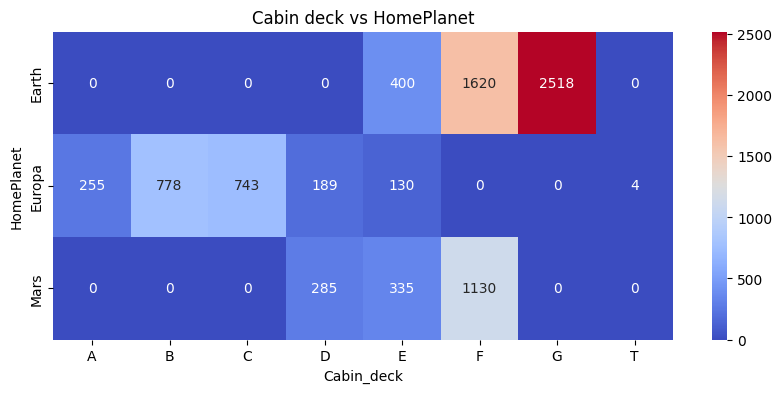

In [33]:
CD_HP = df.groupby(['Cabin_deck', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

plt.figure(figsize=(10,4))
sns.heatmap(CD_HP.T, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Cabin deck vs HomePlanet')
plt.show()

From the heatmap we can conclude HomePlant for some Cabin_Decks.
* Decks: A, B, C and T are 100% with HomePlant = Europa
* Deck: G is 100% Earth 
* Decks: D, E, F are mixed with multiple planets

In [34]:
# Start number of missing HomePlanet values
HP_starts = df['HomePlanet'].isna().sum()

# Fill missing HomePlanet values based on Cabin_deck
df.loc[(df['HomePlanet'].isna()) & (df['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet'] = 'Europa'
df.loc[(df['HomePlanet'].isna()) & (df['Cabin_deck'].isin(['G'])), 'HomePlanet'] = 'Earth'

# Print number of missing values
print("Number of missing HomePlanet values before filling:", HP_starts)
print("HomePlanet missing values filled from Cabin_deck:", HP_starts - df['HomePlanet'].isna().sum())
print("Number of missing HomePlanet values after filling:", df['HomePlanet'].isna().sum())

Number of missing HomePlanet values before filling: 111
HomePlanet missing values filled from Cabin_deck: 48
Number of missing HomePlanet values after filling: 63


**HomePlanet and Last_Name**

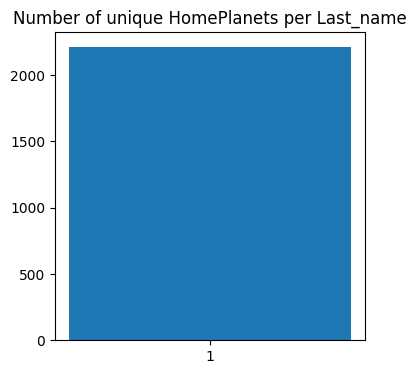

In [35]:
LN_HP= df.groupby(['Last_name', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

counts = (LN_HP > 0).sum(axis=1).value_counts().sort_index()

plt.figure(figsize=(4,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title('Number of unique HomePlanets per Last_name')
plt.show()


Passengers with the same last name came from the same home planet

In [36]:
# Missing values before
HP_bef=df['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a family with known HomePlanet
SHP_index=df[df['HomePlanet'].isna()][(df[df['HomePlanet'].isna()]['Last_name']).isin(LN_HP.index)].index

# Fill missing values
df.loc[SHP_index,'HomePlanet']=df.iloc[SHP_index,:]['Last_name'].map(lambda x: LN_HP.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',df['HomePlanet'].isna().sum())

#HomePlanet missing values before: 63
#HomePlanet missing values after: 8


In [37]:
df[df['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,First_name,Last_name,FamilySize
225,0242_01,NaN,False,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,...,1,0,0,0,0,0,0,Almone,Sté,1.0
2274,2443_01,NaN,False,TRAPPIST-1e,31.0,False,1458.0,421.0,76.0,0.0,...,1,0,0,0,0,0,0,Unknown,NaN,NaN
2631,2817_01,NaN,False,TRAPPIST-1e,25.0,False,237.0,0.0,910.0,0.0,...,0,1,0,0,0,0,0,Sealfs,Sutty,1.0
3091,3331_01,NaN,False,TRAPPIST-1e,40.0,False,666.0,4.0,83.0,0.0,...,0,0,1,0,0,0,0,Unknown,NaN,NaN
4548,4840_01,NaN,True,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,0.0,...,0,0,0,1,0,0,0,Unknown,NaN,NaN
5252,5603_01,NaN,False,TRAPPIST-1e,34.0,False,170.0,1256.0,0.0,3926.0,...,0,1,0,0,0,0,0,Kocha,Cluitty,1.0
5634,5989_01,NaN,False,TRAPPIST-1e,20.0,False,0.0,0.0,NaN,703.0,...,0,0,0,1,0,0,0,Darrie,Holcompton,1.0
5762,6108_01,NaN,False,TRAPPIST-1e,13.0,False,206.0,28.0,0.0,1.0,...,0,0,0,1,0,0,0,Unknown,NaN,NaN


The remaining Passengers all have the same Destination and are all not VIPs


**HomePlant and VIP**

<Axes: xlabel='HomePlanet', ylabel='VIP'>

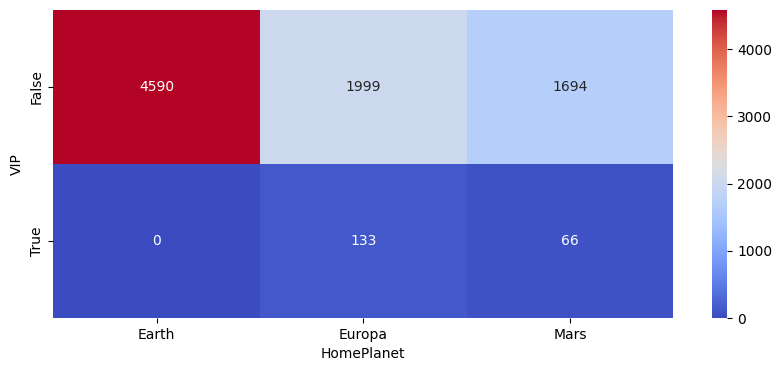

In [38]:
# Joint distribution of HomePlanet and VIP
HP_vip=df.groupby(['HomePlanet','VIP'])['VIP'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HP_vip.T, annot=True, fmt='g', cmap='coolwarm')

Most non-VIPs are from Earth but its hard to be certain because there are not that many VIPs total so we will look at Destination vs HomePlanet heatmap first.

<Axes: xlabel='HomePlanet', ylabel='Destination'>

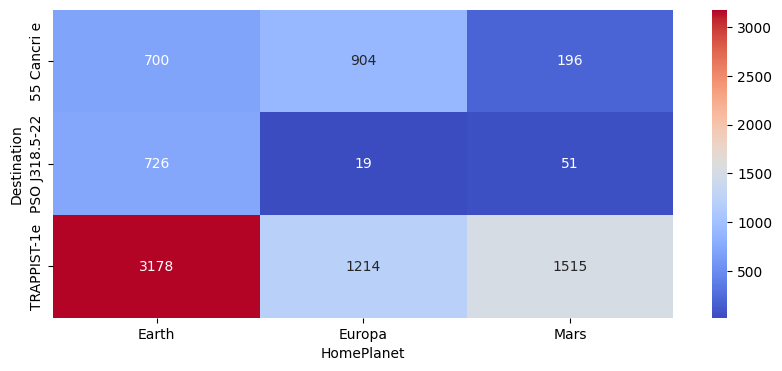

In [39]:
# Joint distribution of HomePlanet and Destination
HP_D=df.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HP_D.T, annot=True, fmt='g', cmap='coolwarm')

By far most passengers heading to TRAPPIST-1e are from Earth, but we remember that earlier we found that no one from deck D is also from Earth.

In [40]:
# Missing values before
HP_bef=df['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
df.loc[(df['HomePlanet'].isna()) & ~(df['Cabin_deck']=='D'), 'HomePlanet']='Earth'
df.loc[(df['HomePlanet'].isna()) & (df['Cabin_deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',df['HomePlanet'].isna().sum())

#HomePlanet missing values before: 8
#HomePlanet missing values after: 0


HomePlanet has no missing values.

**Filling Destination**

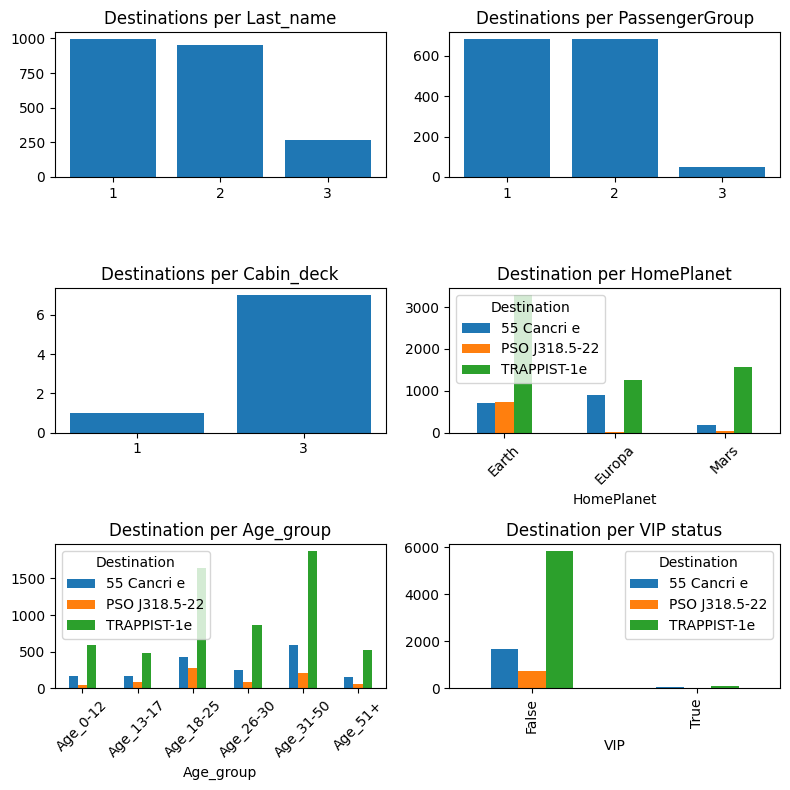

In [ ]:
# Destination per Last_name
LN_HP= df.groupby(['Last_name', 'Destination'])['Destination'].size().unstack().fillna(0)
counts_ln = (LN_HP > 0).sum(axis=1).value_counts().sort_index()
plt.figure(figsize=(8,8))
plt.subplot(3,2,1)
plt.bar(counts_ln.index.astype(str), counts_ln.values)
plt.title('Destinations per Last_name')

# AI used in the next subplot https://chatgpt.com/share/697de161-3acc-8011-8886-3cded01970ce
# Destination per PassengerGroup (only groups with more than 1 member)
group_sizes = df['PassengerGroup'].value_counts()
valid_groups = group_sizes[group_sizes > 1].index
df_multi = df[df['PassengerGroup'].isin(valid_groups)]
PG_HP= df_multi.groupby(['PassengerGroup', 'Destination'])['Destination'].size().unstack().fillna(0)
counts_pg = (PG_HP > 0).sum(axis=1).value_counts().sort_index()
plt.subplot(3,2,2)
plt.bar(counts_pg.index.astype(str), counts_pg.values)
plt.title('Destinations per PassengerGroup')

# Destination per Cabin_deck
CD_D= df.groupby(['Cabin_deck', 'Destination'])['Destination'].size().unstack().fillna(0)
counts_cd = (CD_D > 0).sum(axis=1).value_counts().sort_index()
plt.subplot(3,2,3)
plt.bar(counts_cd.index.astype(str), counts_cd.values)
plt.title('Destinations per Cabin_deck')


# Destination per homeplanet
HP_D= df.groupby(['HomePlanet', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(3,2,4)
HP_D.plot(kind='bar', ax=plt.gca())
plt.title('Destination per HomePlanet')
plt.xticks(rotation=45)
plt.legend(title='Destination')

# Destination per age group
AG_D= df.groupby(['Age_group', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(3,2,5)
AG_D.plot(kind='bar', ax=plt.gca())
plt.title('Destination per Age_group')
plt.xticks(rotation=45)

# Destination per total spent
TS_D= df.groupby(['VIP', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(3,2,6)
TS_D.plot(kind='bar', ax=plt.gca())
plt.title('Destination per VIP status')

plt.tight_layout()
plt.show()

In [41]:
dest_cnt = df['Destination'].value_counts()

print("Destination value counts:\n", dest_cnt)

sum_dst = dest_cnt.sum()
print("Total number of passengers with Destination:", sum_dst)
print(" ")

print("TRAPPIST-1e percentage:", dest_cnt['TRAPPIST-1e']/sum_dst*100)
print("55 Cancris percentage:", dest_cnt['55 Cancri e']/sum_dst*100)
print("PSO J318.5-22 percentage:", dest_cnt['PSO J318.5-22']/sum_dst*100)

Destination value counts:
 Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
Total number of passengers with Destination: 8511
 
TRAPPIST-1e percentage: 69.49829632240629
55 Cancris percentage: 21.149101163200566
PSO J318.5-22 percentage: 9.352602514393137


We could'nt find a good way to fill Destination and we can see that TRAPPIST-1e is by far the most common destination for all of the comparisons we did, because of that we will set all destination nulls to TRAPPIST-1e.

In [42]:
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')
df['Destination'].isna().sum()

0

**Last_Name and PassengerGroup**

Text(0.5, 1.0, 'Number of unique last names by group')

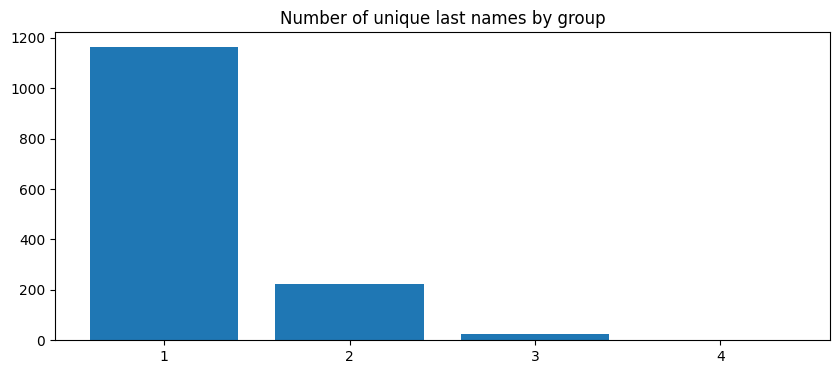

In [43]:
# Joint distribution of Group and Surname
GSN_gb=df[df['GroupSize']>1].groupby(['PassengerGroup','Last_name'])['Last_name'].size().unstack().fillna(0)

counts = (GSN_gb > 0).sum(axis=1).value_counts().sort_index()
# Countplot of unique values
plt.figure(figsize=(10,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title('Number of unique last names by group')

The plot above shows that most passenger groups have the same last name. We will fill last names accordingly.

In [69]:
LN_start = df['Last_name'].isna().sum()

GSN_index=df[df['Last_name'].isna()][(df[df['Last_name'].isna()]['PassengerGroup']).isin(GSN_gb.index)].index

df.loc[GSN_index,'Last_name']=df.iloc[GSN_index,:]['PassengerGroup'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

print('#Last_name missing values before:',LN_start)
print('#Last_name missing values after:',df['Last_name'].isna().sum())

#Last_name missing values before: 200
#Last_name missing values after: 104


In [70]:
# Replace NaN's with outliers (so we can use map)
df['Last_name'].fillna('Unknown', inplace=True)

# Update family size feature
df['Family_size']=df['Last_name'].map(lambda x: df['Last_name'].value_counts()[x])

# Put NaN's back in place of outliers
df.loc[df['Last_name']=='Unknown','Last_name']=np.nan

# Say unknown surname means no family
df.loc[df['Family_size']>100,'Family_size']=0

C:\Users\Yuval\AppData\Local\Temp\ipykernel_12864\357992950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last_name'].fillna('Unknown', inplace=True)
